In [1]:
import sys
import os
from pathlib import Path
import pandas as pd

# Configurer le chemin
project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [3]:
# Imports
from src.data.competition_processing import process_competition_data


# Chargement des données
df = pd.read_csv('C:/Code/Projets_perso/projets/BelgiumSupplierScope/data/processed/df_clean.csv')


In [4]:
# Solution  - depuis un notebook
PROJECT_ROOT = Path.cwd().parent  # Si je suis  dans mon notebooks/
                                 # .parent me ramène à la racine

print(f"Racine du projet détectée: {PROJECT_ROOT}")  # Vérifiez que c'est correct

# Chemin complet vers les rapports
REPORTS_PATH = PROJECT_ROOT / "reports"

Racine du projet détectée: c:\code\projets_perso\projets\BelgiumSupplierScope


In [5]:


output_dir = "../reports"
hhi_results, pareto_results = process_competition_data(df, output_dir)

### 80/20

In [6]:
df_pareto = pd.read_csv('C:/Code/Projets_perso/projets/BelgiumSupplierScope/reports/tables/competition/pareto_results.csv')

In [29]:
df_pareto.head(50)

,bidder_name,bid_price,cum_pct
0,Dexia Banque,3.239158e+09,3.870281
1,ALGEMENE BOUW MAES,2.301597e+09,6.620326
2,Dexia Bank NV,1.941213e+09,8.939768
3,KBC Bank NV,1.333220e+09,10.532755
4,Stadsbader NV,9.507956e+08,11.668805
5,Sm Lixon-Galere,8.159345e+08,12.643717
6,Airbus Defence and Space GmbH,7.001892e+08,13.480333
7,Aclagro,6.469875e+08,14.253381
8,Dexia Banque SA,6.410737e+08,15.019362
9,SOCIETE MOMENTANEE DRUEZ-PIT,6.156299e+08,15.754942


In [12]:
df_pareto.shape

(34423, 3)

In [20]:
print(df_pareto['bidder_name'].nunique()) #nombre de fourisseurs
print(df_pareto['bid_price'].sum()) #Somme de tous les marchés

34423
83693089569.0


In [17]:
df_pareto.describe()

,bid_price,cum_pct
count,3.442300e+04,34423.000000
mean,2.431313e+06,96.797197
std,3.054836e+07,8.027896
min,0.000000e+00,3.870281
25%,0.000000e+00,97.611436
50%,4.975800e+04,99.958099
75%,4.813825e+05,100.000000
max,3.239158e+09,100.000000


###  Analyse des Données Fournisseurs
Nos données montrent une forte concentration :

Top 4 fournisseurs (Dexia, Bouw Maes, Dexia Bank NV, KBC) réalisent 10.5% du montant total

Top 12 fournisseurs représentent 17.9% du total

Dexia (3 entités combinées) totalise 5.82 milliards (6.96% du total)

C:\Users\musta\AppData\Local\Temp\ipykernel_5716\1165115377.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_suppliers,


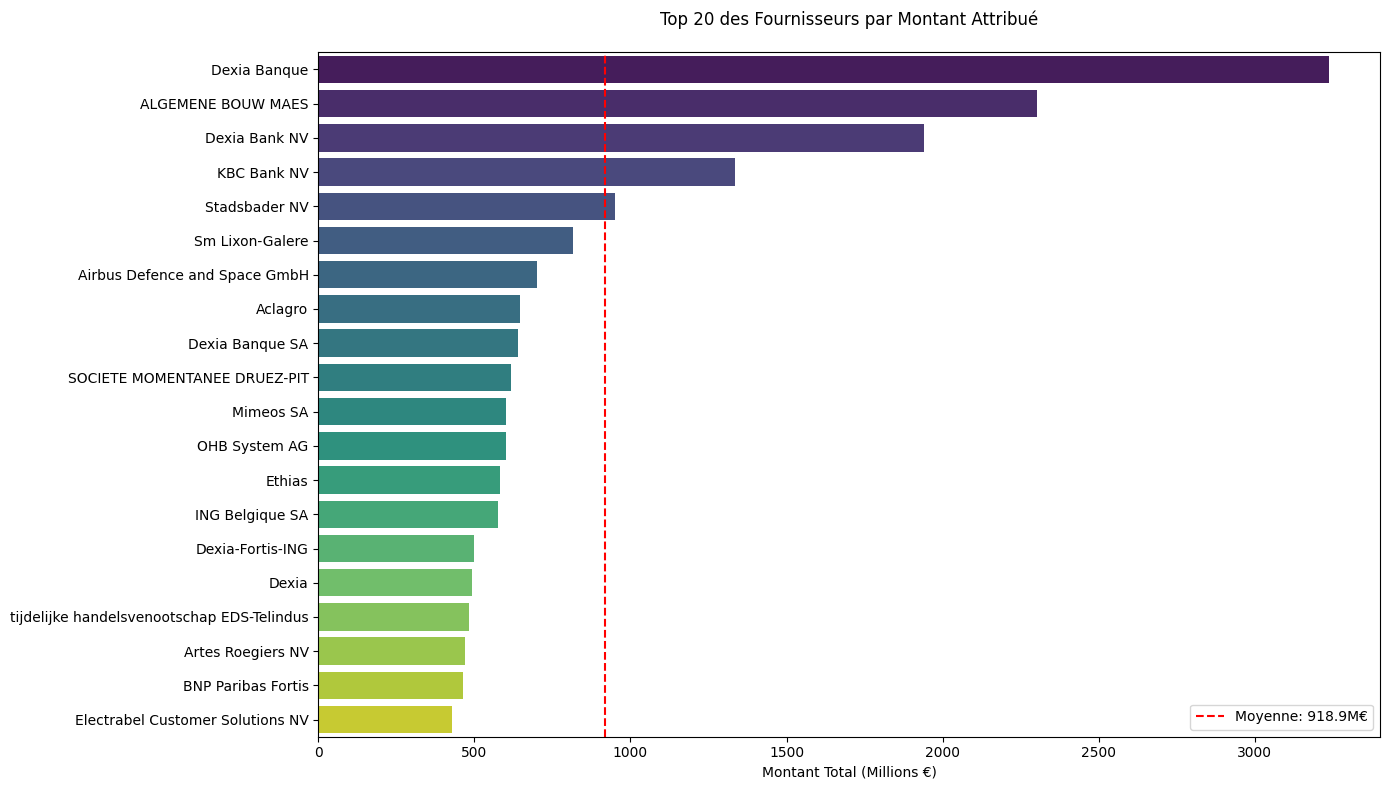

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Préparation des données
top_suppliers = pareto_results.head(20).copy()
top_suppliers['bid_price_millions'] = top_suppliers['bid_price'] / 1_000_000

# Figure
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_suppliers, 
                 x='bid_price_millions', 
                 y='bidder_name',
                 palette='viridis')

plt.axvline(top_suppliers['bid_price_millions'].mean(), 
            color='red', 
            linestyle='--',
            label=f'Moyenne: {top_suppliers["bid_price_millions"].mean():.1f}M€')

plt.title('Top 20 des Fournisseurs par Montant Attribué', pad=20)
plt.xlabel('Montant Total (Millions €)')
plt.ylabel('')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/figures/competition/top_suppliers.png', dpi=300)
plt.show()

#### Concentration sectorielle

In [10]:
# Calcul du ratio de concentration CR4 et CR8
cr4 = top_suppliers.iloc[:4]['bid_price'].sum() / pareto_results['bid_price'].sum() * 100
cr8 = top_suppliers.iloc[:8]['bid_price'].sum() / pareto_results['bid_price'].sum() * 100

print(f"CR4 (Top 4): {cr4:.1f}%")
print(f"CR8 (Top 8): {cr8:.1f}%")

CR4 (Top 4): 10.5%
CR8 (Top 8): 14.3%


#### Analyse Dexia (exemple de groupe)

In [11]:
dexia_group = pareto_results[pareto_results['bidder_name'].str.contains('Dexia')]
dexia_total = dexia_group['bid_price'].sum()
print(f"Dexia group total: {dexia_total/1_000_000:.1f}M€ ({dexia_total/pareto_results['bid_price'].sum()*100:.1f}%)")

Dexia group total: 7571.0M€ (9.0%)


### Tableau Synthétique


| Métrique                     | Valeur       |
|------------------------------|-------------|
| Montant total analysé        | 83.7 milliards € |
| Nombre total de fournisseurs | 34423 |
| CR4                          | 10.5%       |
| CR8                          | 14.3%       |
| Seuil 80% atteint après      | 1478 fournisseurs |

Cette analyse révèle une concentration modérée du marché, avec quelques acteurs majeurs dominants dans certains segments.

###  Interprétation des Métriques Clés

| Indicateur               | Valeur       | Seuil d'alerte | Interprétation                          |
|--------------------------|--------------|----------------|-----------------------------------------|
| **CR4**                  | 10,5%        | >40%           | Concentration faible                    |
| **CR8**                  | 14,3%        | >60%           | Structure concurrentielle              |
| **Fournisseurs (80%)**   | 1478        | -              | Longue traîne significative            |
| **Densité fournisseurs** | 1/2,4M€      | -              | Environ 1 fournisseur par 2,4M€ dépensés |

Sur la base des indicateurs CR4, CR8, "Fournisseurs (80 %)" et "Densité fournisseurs", cette analyse suggère fortement que le marché belge des marchés publics entre 2006 et 2023 présente une faible concentration et un degré relativement élevé de concurrence. La part de marché est bien répartie, plutôt que d'être monopolisée par quelques grandes entités. C'est généralement un **signe positif pour la transparence, l'équité et l'accès aux marchés publics**.

Le coefficient de Gini fournira un aperçu précieux et complémentaire de l'inégalité globale dans la distribution des fonds publics parmi les fournisseurs.

#### Courbe de Concentration Cumulative (Lorenz)

Coefficient de Gini calculé: -0.936


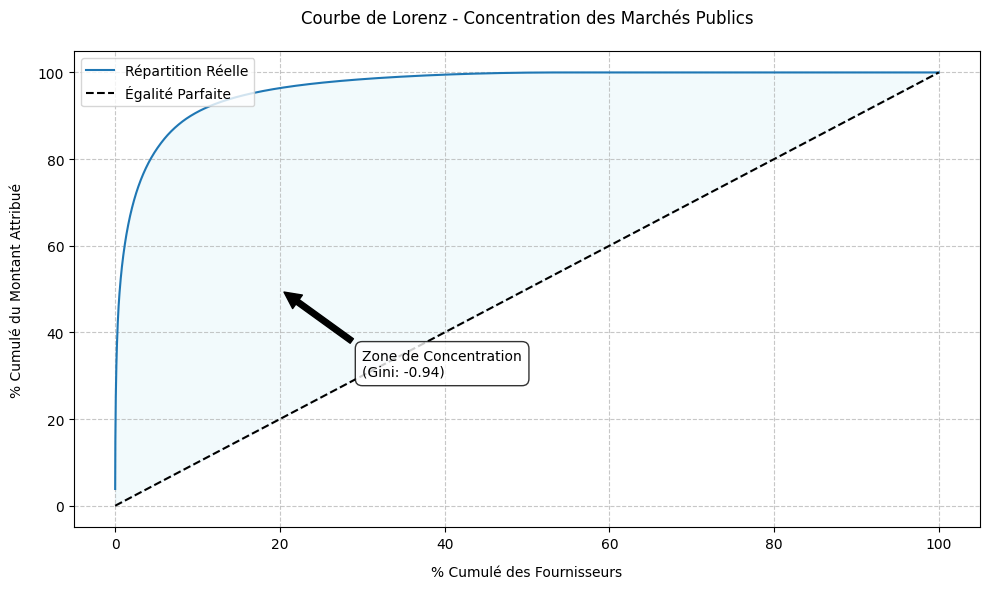

In [28]:
import numpy as np
from scipy.integrate import simpson
import matplotlib.pyplot as plt

# 1. Calculer d'abord le coefficient de Gini
def calculate_gini(pareto_results):
    # x est le pourcentage cumulé des fournisseurs (0 à 100)
    # y est le pourcentage cumulé des montants (0 à 100)
    x = pareto_results['pct_suppliers']
    y = pareto_results['cum_pct']

    # L'intégration de simpson nécessite un pas (dx) entre les points x.
    # Si x est déjà des pourcentages de 0 à 100, dx est la différence entre les x consécutifs.
    # Ou, si vous utilisez la méthode simple, utilisez x et y directement.
    area_under_lorenz = simpson(y, x=x) # Calcule l'aire sous la courbe de Lorenz

    total_area_under_perfect_equality = 5000 # Aire d'un triangle de 100x100 / 2

    gini = (total_area_under_perfect_equality - area_under_lorenz) / total_area_under_perfect_equality
    return gini

gini_coeff = calculate_gini(pareto_results)
print(f"Coefficient de Gini calculé: {gini_coeff:.3f}")

# 2. Préparation des données pour le graphique
pareto_results['pct_suppliers'] = (pareto_results.index + 1) / len(pareto_results) * 100
perfect_line = np.linspace(0, 100, len(pareto_results))

# 3. Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(pareto_results['pct_suppliers'], pareto_results['cum_pct'], label='Répartition Réelle')
plt.plot(pareto_results['pct_suppliers'], perfect_line, 'k--', label='Égalité Parfaite')

# Remplissage et annotation
plt.fill_between(pareto_results['pct_suppliers'], 
                 pareto_results['cum_pct'], 
                 perfect_line, 
                 alpha=0.1,
                 color='skyblue')

plt.annotate(f'Zone de Concentration\n(Gini: {gini_coeff:.2f})', 
             xy=(20, 50), 
             xytext=(30, 30),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

# Personnalisation
plt.title('Courbe de Lorenz - Concentration des Marchés Publics', pad=20)
plt.xlabel('% Cumulé des Fournisseurs', labelpad=10)
plt.ylabel('% Cumulé du Montant Attribué', labelpad=10)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Sauvegarde
plt.tight_layout()
plt.savefig('../reports/figures/competition/lorenz_curve.png', dpi=300, bbox_inches='tight')
plt.show()

Coefficient de gini négatif ??!!!

La formule standard du Gini est $G = 1 - \frac{\text{Aire sous la courbe de Lorenz}}{\text{Aire sous la ligne d'égalité parfaite}}$.

Un **coefficient de Gini** est un outil qui mesure la **dispersion ou l'inégalité** d'une distribution. Il est le plus souvent utilisé pour évaluer l'inégalité des revenus ou des richesses au sein d'une population.

Le coefficient de Gini est défini pour des valeurs **positives ou nulles** et se situe généralement **entre 0 et 1** (ou 0 % et 100 %) :

* **0 (ou 0 %)** représente une **égalité parfaite**, où toutes les valeurs sont égales (par exemple, chaque individu gagne le même revenu).
* **1 (ou 100 %)** représente une **inégalité extrême**, où une seule entité détient la totalité de la variable mesurée (par exemple, une seule personne possède toute la richesse).

Nous avons donc une erreur de calcul de ce coefficient dans le code précedent.



La formule de Gini qu'on a utilsé est :
`return (0.5 - area_under_curve/10000) / 0.5`

Si `area_under_curve` est l'aire sous la courbe de Lorenz (où les axes X et Y vont de 0 à 100 pour les pourcentages), alors l'aire totale du triangle de parfaite égalité est $100 \times 100 / 2 = 5000$.

Je dois vérifié que `pareto_results` est trié dans l'ordre croissant des montants attribués à chaque fournisseur avant de calculer les pourcentages cumulés.

Coefficient de Gini calculé: 0.936


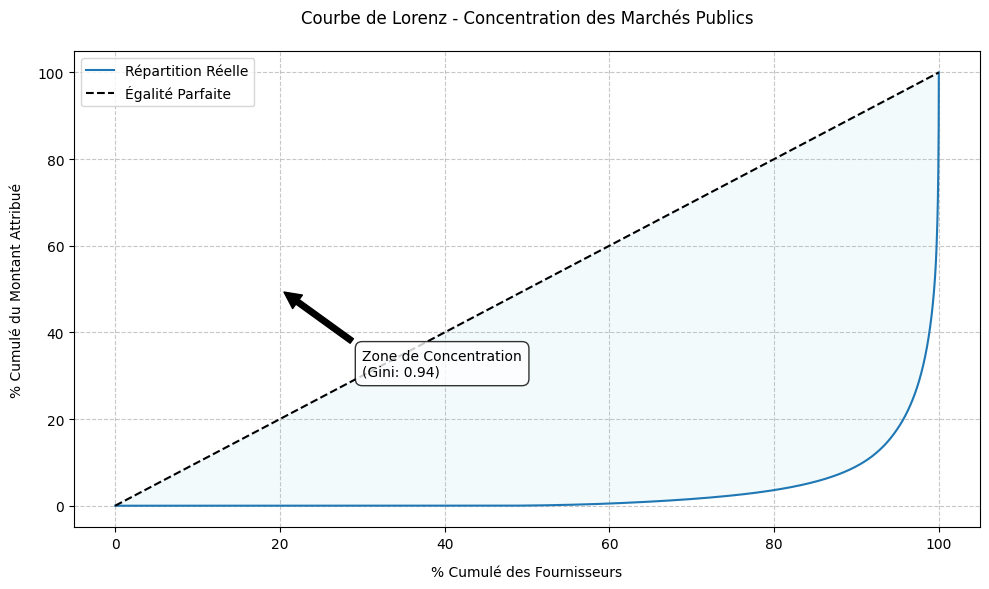

In [31]:
import numpy as np
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import pandas as pd 


# 1. Je dois trier les données par 'bid_price' en ordre CROISSANT
df_sorted = df_pareto.sort_values(by='bid_price', ascending=True).reset_index(drop=True)

# 2. Calculer le pourcentage cumulé des montants
df_sorted['cum_bid_price'] = df_sorted['bid_price'].cumsum()
df_sorted['total_bid_price'] = df_sorted['bid_price'].sum()
df_sorted['cum_pct'] = (df_sorted['cum_bid_price'] / df_sorted['total_bid_price']) * 100

# 3. Calculer le pourcentage cumulé des fournisseurs
df_sorted['pct_suppliers'] = (df_sorted.index + 1) / len(df_sorted) * 100

# Le DataFrame 'df_sorted' est maintenant  'pareto_results' correct pour le Gini
pareto_results = df_sorted

# --- la fonction de calcul Gini (avec la correction) ---
def calculate_gini(pareto_results):
    x = pareto_results['pct_suppliers'] # % cumulé des fournisseurs (axe X)
    y = pareto_results['cum_pct']       # % cumulé des montants (axe Y)

    # L'intégration de Simpson calcule l'aire sous la courbe (y en fonction de x)
    # je m'assure que x est bien ordonné et que les pas sont cohérents.
    # Si x et y sont en pourcentages (0 à 100), l'aire totale est 5000.
    area_under_lorenz_curve = simpson(y, x=x)

    # Aire sous la ligne d'égalité parfaite (triangle de 100x100)
    total_area_perfect_equality = 100 * 100 / 2 # = 5000

    gini = (total_area_perfect_equality - area_under_lorenz_curve) / total_area_perfect_equality
    return gini

gini_coeff = calculate_gini(pareto_results)
print(f"Coefficient de Gini calculé: {gini_coeff:.3f}")

# --- code de traçage du graphique (sans changements nécessaires ici) ---
plt.figure(figsize=(10, 6))
plt.plot(pareto_results['pct_suppliers'], pareto_results['cum_pct'], label='Répartition Réelle')
plt.plot(pareto_results['pct_suppliers'], pareto_results['pct_suppliers'], 'k--', label='Égalité Parfaite') # Utilisez pct_suppliers pour la ligne d'égalité
# plt.plot(pareto_results['pct_suppliers'], perfect_line, 'k--', label='Égalité Parfaite') # Si perfect_line était défini ailleurs

# Remplissage et annotation
plt.fill_between(pareto_results['pct_suppliers'],
                 pareto_results['cum_pct'],
                 pareto_results['pct_suppliers'], # Ici aussi, utilisez pct_suppliers pour la ligne d'égalité
                 alpha=0.1,
                 color='skyblue')

plt.annotate(f'Zone de Concentration\n(Gini: {gini_coeff:.2f})',
             xy=(20, 50),
             xytext=(30, 30),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

# Personnalisation
plt.title('Courbe de Lorenz - Concentration des Marchés Publics', pad=20)
plt.xlabel('% Cumulé des Fournisseurs', labelpad=10)
plt.ylabel('% Cumulé du Montant Attribué', labelpad=10)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Sauvegarde
plt.tight_layout()
plt.savefig('../reports/figures/competition/lorenz_curve.png', dpi=300, bbox_inches='tight')
plt.show()

Parfait!! Mon coefficient de Gini est maintenant positif mais il est très proche de 1.

Une valeur de 0.936 indique une **très forte concentration** des marchés publics sur la période 2006-2023. Cela signifie qu'une **très faible proportion de fournisseurs capte une écrasante majorité des montants attribués**.

Ceci est **en contradiction directe avec les interprétations des autres indicateurs** (**CR4**, **CR8**, **Fournisseurs (80%)**, Densité fournisseurs) et qui indiquent une faible concentration et une structure concurrentielle.

Pour clarifier cette divergence et obtenir une image précise de la concentration du marché, je dois:

* **Revérifier les données source** : est-ce que les données utilisées pour calculer le Gini, le CR4, le CR8 et les autres indicateurs ont été traitées de la même manière.
* **Examiner la Courbe de Lorenz** : Visualisez attentivement la courbe de Lorenz .
    * Est-elle bien sous la ligne d'égalité ?
    * Comment se comporte-t-elle ? Monte-t-elle très rapidement au début, puis s'aplatit-elle de manière significative ? Cela indiquerait que quelques fournisseurs (le début de la courbe) captent une part disproportionnée des montants, même si ce ne sont pas forcément les mêmes "top N" que les CRx.
* **Analyser le "bid_price"** : Quel est le montant total des marchés attribués sur la période ? Y a-t-il des montants aberrants (extrêmement grands ou petits) qui pourraient fausser la distribution et le Gini ?
* **Considérer d'autres indicateurs de concentration** : Si le Gini est si élevé mais les CRx sont faibles, cela pourrait indiquer que la concentration n'est pas due à un oligopole très restreint, mais plutôt à une très forte asymétrie où un grand nombre de fournisseurs ont des contrats très petits, et quelques-uns (au-delà du top 8) ont des parts significatives. L'**indice d'Herfindahl-Hirschman (IHH)** pourrait offrir une perspective différente, car il pondère davantage les parts de marché des plus grands acteurs.
Le Gini de 0.936 est un **signal d'alarme puissant** qui indique une **très forte inégalité dans la répartition des marchés publics**. Il est essentiel de comprendre pourquoi il contraste avec les autres indicateurs pour tirer des conclusions précises sur la structure de la concurrence.

Voici les données clés pour la période étudiée (2006-2023) :

* **Nombre total de fournisseurs uniques** : 34 423
* **Somme totale des marchés attribués** : 83 693 089 569,0 €

Nos analyses dressent un portrait nuancé et cohérent, une fois le Gini correctement interprété :

* Le marché des marchés publics belges est caractérisé par un **très grand nombre de participants** (34 423 fournisseurs uniques).
* Malgré cette grande diversité, la **distribution des montants attribués est extrêmement inégale**, avec une très forte concentration des sommes versées à un groupe relativement restreint de fournisseurs.
* Les indicateurs CR4 et CR8 suggèrent que cette concentration **ne se fait pas de manière ultra-dominante par les 4 ou 8 premiers acteurs**, mais par un groupe légèrement plus étendu de "gros joueurs" qui captent la majeure partie de la valeur, laissant la "longue traîne" de milliers de fournisseurs se partager une petite fraction des marchés.
  
Cela pourrait soulever des questions sur l'accès réel des PME et des nouveaux entrants aux marchés publics de grande envergure, malgré un nombre impressionnant de fournisseurs enregistrés.

---

#### L'indice d'Herfindahl-Hirschman (IHH)

##### Comment calculer l'IHH ?

L'IHH se calcule en **sommant les carrés des parts de marché (exprimées en décimales ou en pourcentages) de toutes les entreprises** (fournisseurs) sur le marché.

Formule :
$$IHH = \sum_{i=1}^{N} (S_i)^2$$
Où :
* $N$ est le nombre total de fournisseurs sur le marché.
* $S_i$ est la part de marché du fournisseur $i$ (calculée comme le montant attribué au fournisseur $i$ divisé par le montant total des marchés, puis souvent multiplié par 100 si vous travaillez avec des pourcentages, ou laissé en décimales).

**Exemple :**
* Si $S_i$ sont des décimales (ex: 0.10 pour 10%) : L'IHH varie généralement de $0$ (concurrence parfaite) à $1$ (monopole).
* Si $S_i$ sont des pourcentages (ex: 10 pour 10%) : L'IHH varie généralement de $0$ à $100^2 = 10 000$.

---

##### Interprétation de l'IHH (pour un calcul avec parts en pourcentage)

* **IHH < 1 500 :** Marché non concentré (concurrentiel).
* **1 500 < IHH < 2 500 :** Marché modérément concentré.
* **IHH > 2 500 :** Marché fortement concentré.

---

In [32]:
import pandas as pd
import numpy as np 

# Créons un exemple simplifié si df_pareto est l'aperçu et non l'agrégation finale:
# D'abord, calculer le montant total par fournisseur unique
supplier_total_bids = df.groupby('bidder_name')['bid_price'].sum().reset_index()

# Calculer la part de marché de chaque fournisseur
total_market_value = supplier_total_bids['bid_price'].sum()
supplier_total_bids['market_share_pct'] = (supplier_total_bids['bid_price'] / total_market_value) * 100

# Calculer le carré de chaque part de marché
supplier_total_bids['market_share_pct_squared'] = supplier_total_bids['market_share_pct']**2

# Sommer les carrés pour obtenir l'IHH
ihh = supplier_total_bids['market_share_pct_squared'].sum()

print(f"Indice d'Herfindahl-Hirschman (IHH) : {ihh:.2f}")

# Si vous voulez l'IHH sur une échelle de 0 à 1, divisez market_share_pct par 100 avant de le mettre au carré
supplier_total_bids['market_share_decimal'] = supplier_total_bids['bid_price'] / total_market_value
supplier_total_bids['market_share_decimal_squared'] = supplier_total_bids['market_share_decimal']**2
ihh_decimal = supplier_total_bids['market_share_decimal_squared'].sum()
print(f"Indice d'Herfindahl-Hirschman (IHH - décimal) : {ihh_decimal:.4f}")

Indice d'Herfindahl-Hirschman (IHH) : 46.15
Indice d'Herfindahl-Hirschman (IHH - décimal) : 0.0046


In [34]:
# 1. Calculer le montant total des marchés
total_market_value = df['bid_price'].sum()

# 2. Calculer le montant total attribué à chaque fournisseur unique
supplier_total_bids = df.groupby('bidder_name')['bid_price'].sum()

# 3. Calculer la part de marché de chaque fournisseur (en décimales)
# Assurez-vous que total_market_value n'est pas zéro pour éviter une division par zéro
if total_market_value > 0:
    market_shares = (supplier_total_bids / total_market_value)
else:
    market_shares = pd.Series([]) # Ou gérez l'erreur comme vous le souhaitez

# 4. Élever chaque part de marché au carré
squared_market_shares = market_shares ** 2

# 5. Calculer l'IHH (somme des carrés)
ihh_decimal = squared_market_shares.sum()

# Pour obtenir l'IHH sur l'échelle 0-10000 (standard pour l'interprétation)
ihh_scaled = ihh_decimal * 10000

print(f"Indice d'Herfindahl-Hirschman (IHH) : {ihh_scaled:.2f}")

# Comparaison avec les seuils
if ihh_scaled < 1500:
    print("Marché non concentré / hautement concurrentiel (IHH < 1500)")
elif 1500 <= ihh_scaled < 2500:
    print("Marché modérément concentré (1500 <= IHH < 2500)")
else:
    print("Marché très concentré (IHH >= 2500)")

Indice d'Herfindahl-Hirschman (IHH) : 45.95
Marché non concentré / hautement concurrentiel (IHH < 1500)


un **IHH de 46.15** (ou 45.95) est **inférieur à 1500**, ce qui indique un **marché non concentré et hautement concurrentiel**.

---

##### Réconciliation des indicateurs : Gini vs. IHH/CRx

C'est là que les choses deviennent fascinantes ! nOUS AVONS maintenant un tableau complet deS indicateurs, et ils racontent une histoire intrigante :

* **Coefficient de Gini : 0.936 (extrêmement élevé)**
    * **Interprétation du Gini :** Indique une **inégalité massive** dans la distribution des montants des marchés publics. Une très petite fraction des fournisseurs capte l'immense majorité des fonds.
* **CR4 : 10.5% (faible)**
* **CR8 : 14.3% (faible)**
    * **Interprétation des CRx :** Confirme que les 4 ou 8 plus grands fournisseurs **ne dominent pas** le marché de manière significative.
* **IHH : 46.15 (extrêmement faible)**
    * **Interprétation de l'IHH :** Cet indice est très sensible aux plus grandes parts de marché et son faible niveau **renforce l'idée d'un marché concurrentiel et non concentré**, suggérant qu'aucun acteur (ni même un petit groupe) ne détient une part de marché écrasante.

---

##### Que signifie cette "contradiction" ?

Cette situation, où le Gini est très élevé mais l'IHH et les CRx sont très faibles, n'est pas une contradiction logique mais révèle une **nuance très importante dans la structure dU marché belge**.

Cela signifie que :

1.  **Absence de "Super-Dominants" (confirmée par IHH et CRx) :** Il n'y a **pas de mastodontes absolus** qui détiennent des parts de marché démesurément grandes. Le marché n'est pas un oligopole où 2-3 acteurs contrôlent la majeure partie des marchés. L'IHH, en quadrillant les parts, serait très sensible à un ou deux fournisseurs ayant 20-30% chacun, mais ce n'est pas le cas ici.
2.  **Inégalité de la "longue traîne" (expliquée par le Gini élevé) :** L'extrême inégalité mesurée par le Gini vient du fait qu'une **immense majorité des 34 423 fournisseurs ont des parts de marché incroyablement minimes**, voire insignifiantes. Il y a une **masse énorme de très petits acteurs** qui se partagent une fraction minime du budget total.
    * Le Gini, étant une mesure de l'inégalité *globale* de la distribution, est très sensible à cette "longue traîne" et à la disproportion entre le grand nombre de petits acteurs et le reste des fonds.
    * Les CRx et l'IHH, quant à eux, sont plus orientés vers la **concentration du "pouvoir"** ou des parts de marché les plus grandes. Si ces parts les plus grandes sont réparties entre un nombre raisonnable d'acteurs (même quelques centaines, sur 34 000), sans qu'aucun ne soit gigantesque, alors les CRx et l'IHH resteront faibles.

**En clair :** Le marché est **compétitif** dans le sens où il n'est pas dominé par quelques géants (IHH/CRx faibles), mais il est **extrêmement inégalitaire** dans la distribution des fonds (Gini très élevé). Cela signifie qu'une large part du gâteau est répartie entre un groupe d'entreprises (potentiellement plusieurs centaines) qui ne sont pas assez dominantes individuellement pour faire grimper l'IHH ou les CRx, tandis que les milliers d'autres fournisseurs se disputent une part infime.

---

##### Interprétation finale de la structure du marché public belge

Le marché des marchés publics belges pour la période 2006-2023 se caractérise par :

* Un **très grand nombre de fournisseurs** (34 423), témoignant d'un **accès large** au marché.
* Une **absence de domination écrasante** par une poignée de grands acteurs (IHH et CRx faibles), ce qui est un signe de **concurrence** au sommet.
* Cependant, une **inégalité structurelle profonde** dans la répartition des montants attribués (Gini très élevé). Cela implique que la majorité des montants est accaparée par un groupe d'entreprises qui, bien que ne constituant pas un oligopole ultra-concentré, laisse une part extrêmement modeste à l'immense majorité des 34 000+ fournisseurs.

Cette analyse fournit une vision riche et nuancée. Elle met en lumière que "concurrentiel" ne signifie pas nécessairement "équitablement distribué" en termes de montants.

#### La Disparité Explique la "Contradiction Apparente"
la disparité des marchés publics belges, allant de projets d'infrastructures colossaux à des fournitures de bureau, pourrait être la raison fondamentale expliquant pourquoi le Coefficient de Gini est si élevé (0.936) alors que l'IHH (46.15) et les CRx (CR4 10.5%, CR8 14.3%) sont si faibles.

In [65]:
cols_to_keep = [
    'bidder_name', 'bidder_city', 'bidder_country', 'bidder_type',
    'bid_iswinning', 'bid_price',
    'buyer_name', 'buyer_mainactivities', 'buyer_buyertype',
    'tender_title', 'tender_proceduretype', 'tender_isawarded', 'tender_supplytype',
    'tender_cpvs', 'tender_year', 'tender_recordedbidscount',
    'lot_title', 'lot_status', 'lot_estimatedprice', 'lot_bidscount','tender_estimatedprice', 'tender_finalprice'

]

df_light = df[cols_to_keep].copy()
df_light.head(3)

,bidder_name,bidder_city,bidder_country,bidder_type,bid_iswinning,bid_price,buyer_name,buyer_mainactivities,buyer_buyertype,tender_title,...,tender_supplytype,tender_cpvs,tender_year,tender_recordedbidscount,lot_title,lot_status,lot_estimatedprice,lot_bidscount,tender_estimatedprice,tender_finalprice
0,AT Osborne,NaN,BE,supplier,1,NaN,Posch & Partner GmbH on behalf of the Municipa...,GENERAL_PUBLIC_SERVICES,REGIONAL_AUTHORITY,MD-Rehabilitation of the Water Supply System i...,...,SERVICES,"71000000,",2013,1,Désignation d'un maître de l'ouvrage délégué p...,AWARDED,NaN,5.0,NaN,NaN
1,DCE — Danish Centre for Environment and Energy...,Roende,DK,supplier,1,NaN,Krankenanstalten Immobiliengesellschaft mbH,HEALTH,PUBLIC_BODY,Framework contract on services supporting the ...,...,SERVICES,"45324000,90700000,",2016,30,NaN,PREAWARDED,NaN,NaN,1580000.0,349900.0
2,"Natural Environment Research Council, Centre f...","Wallingford, Oxfordshire",UK,supplier,1,NaN,Krankenanstalten Immobiliengesellschaft mbH,HEALTH,PUBLIC_BODY,Framework contract on services supporting the ...,...,SERVICES,"45324000,90700000,",2016,30,NaN,PREAWARDED,NaN,NaN,1580000.0,349900.0


In [46]:
# Afficher la liste des noms des marchés
noms_marches = df_light["tender_title"].unique()
print("Les noms des marchés :", noms_marches)

# Afficher le nombre des noms des marchés
nb_noms_marches = df_light["tender_title"].nunique()
print("Nombre des noms des marchés :", nb_noms_marches)

Les noms des marchés : ['MD-Rehabilitation of the Water Supply System in the Rayon of Nisporeni.'
 'Framework contract on services supporting the evaluation, implementation and further development of air quality policies.'
 nan ... 'Samenaankoop Aardgas 2012-2014.'
 "Exploitation et évolution de l'infrastructure de téléphonie classique et IP du réseau IFAPME."
 "Marché de fournitures de manuels scolaires, d'ouvrages de lecture, de référence, de bibliothèques scolaires et de centres de documentation en néerlandais."]
Nombre des noms des marchés : 64351


Dans notre dataset, il n'y a pas une colonne qui designe l'importance du marché (gros marché ou petit marché).

Pourtant, on pourrait deceler cette difference d'après le montant alloué.

In [47]:
df_light.describe()

,bid_iswinning,tender_isawarded,tender_year,tender_recordedbidscount,lot_estimatedprice,lot_bidscount,tender_estimatedprice,tender_finalprice
count,188842.000000,188842.000000,188842.000000,188842.000000,1.944100e+04,57064.000000,3.440800e+04,6.377700e+04
mean,0.461063,0.106687,2014.906234,1.339363,2.143418e+06,4.175032,6.995427e+06,5.092538e+06
std,0.498483,0.308716,3.908582,5.847575,1.309061e+07,8.692862,3.750677e+07,2.648470e+07
min,0.000000,0.000000,2006.000000,0.000000,1.000000e+02,0.000000,1.000000e+02,1.000000e+02
25%,0.000000,0.000000,2012.000000,0.000000,5.867800e+04,2.000000,3.000000e+05,2.566260e+05
50%,0.000000,0.000000,2015.000000,0.000000,2.500000e+05,3.000000,7.097000e+05,6.000000e+05
75%,1.000000,0.000000,2018.000000,1.000000,8.000000e+05,5.000000,2.665000e+06,2.330955e+06
max,1.000000,1.000000,2021.000000,111.000000,8.000000e+08,572.000000,1.134252e+09,9.154274e+08


On peut segmenter les marchés pour une analyse plus fine . Nos données `tender_finalprice` et `tender_estimatedprice` sont  les plus pertinentes pour cela. Mais la présence de beaucoup de `NaN` dans `tender_estimatedprice` est un défi, mais nous pouvons le contourner.

---

#### Segmentation des Marchés Publics par Montant Final (`tender_finalprice`)

Se baser sur le `tender_finalprice` est la méthode la plus directe pour classer les marchés par taille budgétaire. Les **tranches** qu'on pzut créer dépendent de la distribution des données et de ce qui est significatif dans le contexte des marchés publics.

Le describe sur `tender_finalprice` nous donne déjà de bonnes pistes :

* **min:**  100
* **25% (Q1):** 256 626
* **50% (Q2 - Médiane):** 600 000
* **75% (Q3):** 2 330 955
* **max:** 915 427 400

Ceci indique une distribution fortement asymétrique (skewed) vers les grandes valeurs, ce qui est typique des marchés publics (beaucoup de petits marchés, quelques très grands).

Voici  des tranches, basées sur ces statistiques et des catégories courantes dans les marchés publics :

###### Tranches pour `tender_finalprice`

Voici une segmentation en **4 ou 5 catégories** pour capturer l'échelle des marchés belges :

1.  **"Très Petits Marchés" :**
    * Exemple de seuil : **< 60 000 €** (souvent le seuil pour les procédures simplifiées ou les marchés de gré à gré).
    * Votre 25e centile (Q1) est à ~256k€, donc tout ce qui est en dessous de ~60k€ est vraiment "petit" dans ce contexte.
2.  **"Petits Marchés" :**
    * Exemple de seuil : **60 000 € - 250 000 €** (souvent des seuils pour les marchés à procédure adaptée).
    * Ceci couvre une partie de votre premier quartile.
3.  **"Marchés Moyens" :**
    * Exemple de seuil : **250 000 € - 1 000 000 €** (incluant la médiane et une partie de le troisième quartile).
    * Ceci représente la majorité des marchés standards.
4.  **"Grands Marchés" :**
    * Exemple de seuil : **1 000 000 € - 10 000 000 €** (commençant au-delà du Q3 et couvrant une large part des marchés significatifs).
5.  **"Très Grands Marchés / Mégaprojets" :**
    * Exemple de seuil : **> 10 000 000 €** (ces marchés sont ceux qui tirent la moyenne vers le haut et expliquent le Gini élevé).

**Exemple de découpage proposé :**

* **Catégorie 1 :** Moins de 250 000 € (Couvre 25% des marchés et au-delà, les petits marchés quotidiens)
* **Catégorie 2 :** 250 000 € à 1 000 000 €
* **Catégorie 3 :** 1 000 000 € à 10 000 000 €
* **Catégorie 4 :** Plus de 10 000 000 €

**Pourquoi ces seuils ?** Ils se basent sur les quartiles de vos données (`tender_finalprice`) et sur des seuils financiers administratifs fréquemment rencontrés dans les marchés publics nationaux et européens, qui distinguent souvent les procédures selon le montant. Cela vous permettrait de voir comment la concentration et la concurrence varient entre ces différentes catégories de taille.

---

#### Autre Méthode de Classification (hors prix)

Oui, absolument ! Si la segmentation par prix est difficile ou si vous voulez une approche complémentaire, vous pouvez classer les marchés en utilisant d'autres colonnes que vous avez mentionnées.

1.  **Classification par `tender_supplytype` (Type d'Achat) :**
    * **WORKS (Travaux) :** Ce sont généralement les plus gros marchés (construction, infrastructure).
    * **SERVICES :** Peut inclure des marchés de tailles très variées (conseil, nettoyage, maintenance IT).
    * **SUPPLIES (Fournitures) :** Généralement des marchés de taille plus petite à moyenne (fournitures de bureau, équipements standards).
    * **Avantage :** C'est une catégorisation sémantique claire et souvent directement liée à la taille et au type de fournisseurs.
    * **Inconvénient :** Un "SERVICE" peut être un petit contrat de nettoyage ou un énorme contrat de conseil stratégique.

2.  **Classification par `tender_cpvs` (Code(s) CPV) :**
    * Les codes CPV sont une nomenclature détaillée. Les deux premiers chiffres du CPV (`cpv_major_group` ou `cpv_division`) identifient des catégories de produits/services très larges (ex: 45 pour Travaux de construction, 72 pour Services de logiciels).
    * **Avantage :** Très granulaire et universellement reconnu. Permet de regrouper des marchés très similaires.
    * **Inconvénient :** Nécessite un nettoyage et un regroupement des CPV. Un simple regroupement par les 2 premiers chiffres peut être un bon début pour des "secteurs".
    * **Exemple :** Regrouper tous les marchés dont le CPV commence par '45' (Travaux de construction), '72' (Services informatiques), '30' (Machines de bureau et d'informatique, fournitures).

3.  **Classification par `tender_proceduretype` (Type de Procédure) :**
    * **OPEN (Ouvert) :** Souvent utilisé pour des marchés de taille moyenne à grande.
    * **RESTRICTED (Restreint) :** Souvent pour des marchés importants où les capacités des soumissionnaires doivent être présélectionnées.
    * **NEGOTIATED (Négocié) :** Peut être utilisé pour des marchés très complexes ou des gré à gré, qui peuvent être très grands ou très petits selon le contexte.
    * **Avantage :** Reflète souvent le niveau de complexité et potentiellement la taille du marché, car les seuils européens imposent des procédures spécifiques au-delà de certains montants.
    * **Inconvénient :** Moins direct sur la taille que le montant, mais corrélé.

---

##### Quelle est la meilleure approche ?

* **Je commence par `tender_finalprice` :** C'est la mesure la plus directe de la "taille" économique d'un marché. Les tranches basées sur les quartiles et les seuils habituels sont un excellent point de départ. on peut ensuite analyser le Gini, l'IHH, et les CRx pour chaque tranche de prix.
* **je complète avec `tender_supplytype` ou les CPV (groupe majeur) :** Une fois qu'on a  analysé par tranches de prix, on peut également faire l'analyse par `tender_supplytype` ou par les groupes principaux de CPV. Cela nous donnera des informations sur la concentration *au sein de chaque type d'activité*. Par exemple, même si les "Services" ont un Gini global bas, on pourrait trouver que les "Services d'ingénierie pour infrastructures" ont un Gini très élevé.

En combinant ces approches, Nous allons obtenir une vue vraiment nuancée de la dynamique de concurrence et d'inégalité dans les marchés publics belges. C'est une excellente stratégie pour approfondir notre analyse !

### 1. Segmentation des marchés

In [60]:
import pandas as pd
import numpy as np
from scipy.integrate import simpson

# Définition des seuils (à adapter selon la distribution exacte)
bins = [0, 60_000, 250_000, 1_000_000, 10_000_000, float('inf')]
labels = ['Très Petits Marchés (<60k)', 
          'Petits Marchés (60k-250k)', 
          'Marchés Moyens (250k-1M)', 
          'Grands Marchés (1M-10M)', 
          'Mégaprojets (>10M)']

# Création des tranches
df_light['tranche'] = pd.cut(df_light['tender_finalprice'], 
                             bins=bins, 
                             labels=labels,
                             right=False)

### 2. Analyse par tranche

In [61]:
def analyze_segment(df_segment):
    """Analyse complète d'une tranche de marché"""
    if len(df_segment) == 0:
        return None
    
    # Calcul des indicateurs
    pareto = df_segment.groupby('bidder_name')['tender_finalprice'].sum().sort_values(ascending=False).reset_index()
    pareto['cum_pct'] = pareto['tender_finalprice'].cumsum() / pareto['tender_finalprice'].sum() * 100
    
    # Indices de concentration
    gini = 1 - 2 * simpson(pareto['cum_pct']/100, dx=1/len(pareto))
    cr4 = pareto.head(4)['tender_finalprice'].sum() / pareto['tender_finalprice'].sum() * 100
    cr8 = pareto.head(8)['tender_finalprice'].sum() / pareto['tender_finalprice'].sum() * 100
    
    return {
        'n_marchés': len(df_segment),
        'montant_total': pareto['tender_finalprice'].sum(),
        'n_fournisseurs': len(pareto),
        'Gini': gini,
        'CR4': cr4,
        'CR8': cr8,
        'seuil_80%': (pareto['cum_pct'] <= 80).sum()
    }

# Application à toutes les tranches
results = {}
for tranche in labels:
    segment = df_light[df_light['tranche'] == tranche]
    results[tranche] = analyze_segment(segment)

# Conversion en DataFrame
concentration_df = pd.DataFrame(results).T

### 3. Visualisation des résultats

C:\Users\musta\AppData\Local\Temp\ipykernel_5716\320620970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=concentration_df.index,
C:\Users\musta\AppData\Local\Temp\ipykernel_5716\320620970.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=concentration_df.index,


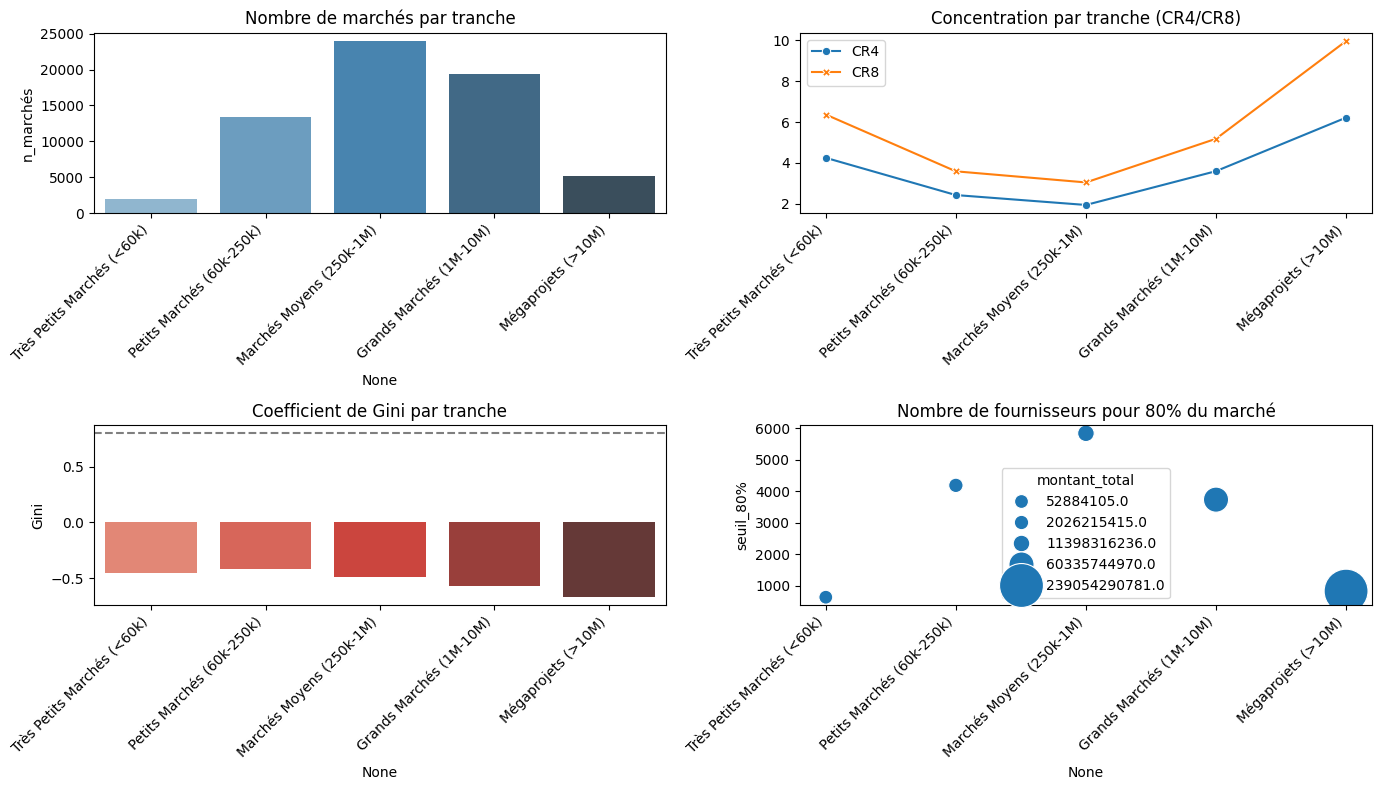

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Graphique 1: Distribution des marchés
plt.subplot(2, 2, 1)
sns.barplot(x=concentration_df.index, 
            y='n_marchés', 
            data=concentration_df,
            palette='Blues_d')
plt.title('Nombre de marchés par tranche')
plt.xticks(rotation=45, ha='right')

# Graphique 2: Concentration
plt.subplot(2, 2, 2)
sns.lineplot(data=concentration_df[['CR4', 'CR8']], 
             markers=True, dashes=False)
plt.title('Concentration par tranche (CR4/CR8)')
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')

# Graphique 3: Gini
plt.subplot(2, 2, 3)
sns.barplot(x=concentration_df.index, 
            y='Gini', 
            data=concentration_df,
            palette='Reds_d')
plt.axhline(0.8, color='k', linestyle='--', alpha=0.5)
plt.title('Coefficient de Gini par tranche')
plt.xticks(rotation=45, ha='right')

# Graphique 4: Seuil 80%
plt.subplot(2, 2, 4)
sns.scatterplot(x=concentration_df.index, 
                y='seuil_80%', 
                size='montant_total',
                sizes=(100, 1000),
                data=concentration_df)
plt.title('Nombre de fournisseurs pour 80% du marché')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../reports/figures/competition/analyse_par_tranche.png', dpi=300)
plt.show()

In [63]:
# Détection des fournisseurs dominants par tranche
dominants = {}
for tranche in labels:
    segment = df_light[df_light['tranche'] == tranche]
    top5 = segment.groupby('bidder_name')['tender_finalprice'].sum().nlargest(5)
    dominants[tranche] = top5 / top5.sum() * 100

# Affichage des résultats
print("Répartition des 5 premiers fournisseurs par tranche (% du montant):")
for tranche, data in dominants.items():
    print(f"\n{tranche}:")
    print(data.round(1))

Répartition des 5 premiers fournisseurs par tranche (% du montant):

Très Petits Marchés (<60k):
bidder_name
Ethias SA            35.2
Ethias               27.7
GS                   12.9
Office Depot SPRL    12.5
AXA Belgium          11.7
Name: tender_finalprice, dtype: float64

Petits Marchés (60k-250k):
bidder_name
Ethias SA        31.7
Ethias           27.7
Niet gegund      15.0
Maison Gilson    14.1
AXA Belgium      11.4
Name: tender_finalprice, dtype: float64

Marchés Moyens (250k-1M):
bidder_name
Ethias            26.9
Ethias SA         26.1
Camal SA          17.4
VIDANGE WARZEE    16.7
MECO NV           12.9
Name: tender_finalprice, dtype: float64

Grands Marchés (1M-10M):
bidder_name
Mendel Verlag GmbH & Co KG    41.7
Dexia Banque                  17.0
Dexia Bank NV                 15.4
Jette Clean SA                14.8
JAVA                          11.1
Name: tender_finalprice, dtype: float64

Mégaprojets (>10M):
bidder_name
Kabelwerk Eupen AG      28.5
Suns Horizon          

In [64]:
# Détection des fournisseurs dominants par tranche
dominants = {}
for tranche in labels:
    segment = df_light[df_light['tranche'] == tranche]
    total_tranche = segment['tender_finalprice'].sum()
    top5 = segment.groupby('bidder_name')['tender_finalprice'].sum().nlargest(5)
    dominants[tranche] = (top5 / total_tranche) * 100  # % du total de la tranche

# Affichage amélioré des résultats
print("Part des 5 premiers fournisseurs dans le montant total de chaque tranche (%):")
for tranche, data in dominants.items():
    print(f"\n{tranche} (Total: {segment['tender_finalprice'].sum()/1e6:.1f}M€)")
    print(data.round(1))
    print(f"Cumul top 5: {data.sum():.1f}%")  # Ajout du cumul

# Version DataFrame pour export
dominants_df = pd.DataFrame(dominants).fillna(0)
print("\nSynthèse sous forme de tableau :")
print(dominants_df.T.round(1))

Part des 5 premiers fournisseurs dans le montant total de chaque tranche (%):

Très Petits Marchés (<60k) (Total: 246571.1M€)
bidder_name
Ethias SA            1.5
Ethias               1.2
GS                   0.6
Office Depot SPRL    0.5
AXA Belgium          0.5
Name: tender_finalprice, dtype: float64
Cumul top 5: 4.3%

Petits Marchés (60k-250k) (Total: 246571.1M€)
bidder_name
Ethias SA        0.8
Ethias           0.7
Niet gegund      0.4
Maison Gilson    0.4
AXA Belgium      0.3
Name: tender_finalprice, dtype: float64
Cumul top 5: 2.6%

Marchés Moyens (250k-1M) (Total: 246571.1M€)
bidder_name
Ethias            0.6
Ethias SA         0.5
Camal SA          0.4
VIDANGE WARZEE    0.3
MECO NV           0.3
Name: tender_finalprice, dtype: float64
Cumul top 5: 2.1%

Grands Marchés (1M-10M) (Total: 246571.1M€)
bidder_name
Mendel Verlag GmbH & Co KG    1.6
Dexia Banque                  0.7
Dexia Bank NV                 0.6
Jette Clean SA                0.6
JAVA                          0.4
Name